In [1]:
from functools import reduce
import numpy as np
import pandas as pd
import matplotlib


links = pd.read_csv("C:\\Users\\Vipul Satone\\IGL\\data/links.csv")
nodes = pd.read_csv("C:\\Users\\Vipul Satone\\IGL\\data/nodes.csv")

In [2]:
# colors = ["blue","red","green", "pink","yellow","black","indian red","light lavendar","squash",
# "cloudy blue","dark pastel green","dust","electric lime","fresh green","light eggplant",
# "nasty green","really light blue","tea","warm purple","yellowish tan","cement",
# "dark grass green","dusty teal","grey teal","pinkish tan","spruce","strong blue","windows blue",
# "blue","bright sea green","dark green blue","deep turquoise","green teal","strong pink",
# "bland","deep aqua","lavender pink","olive yellow","pig pink","deep lilac","desert",
# "dusty lavender","purpley grey","purply","candy pink","light pastel green""boring green",
# "kiwi green","light grey green""orange pink""tea green","very light brown","egg shell",
# "eggplant purple","powder pink","reddish grey","liliac","stormy blue","deep brown",
# "browny green","sickly yellow","sunny yellow","azul","darkgreen","pale gold","dark cream",
# "cocoa","light royal blue","sand brown","tealish green","burnt siena","camo","dusk blue"
# "old rose","peachy pink","rosy pink","light seafoam","browny orange","sapphire","parchment",
# "light gold","topaz","violet pink","wintergreen","yellow tan","dark fuchsia","indigo blue",
# "pale magenta","leather"]
# colors = ['#56ae57',
#  '#b2996e',
#  '#a8ff04',
#  '#894585',
#  '#65ab7c',
#  '#952e8f',
#  '#fcfc81',
#  '#a5a391',
#  '#4c9085',
#  '#efb435',
#  '#0a5f38',
#  '#9bb53c',
#  '#017374',
#  '#afa88b',
#  '#c2b709',
#  '#ccad60',
#  '#983fb2',
#  '#fffcc4',
#  '#ad900d',
#  '#c48efd',
#  '#fffd78',
#  '#c9d179',
#  '#fffa86',
#  '#7e4071',
#  '#1d5dec',
#  '#054907',
#  '#8fb67b',
#  '#fdde6c',
#  '#6832e3',
#  '#fdb147',
#  '#c7ac7d',
#  '#850e04',
#  '#f2ab15',
#  '#ac4f06',
#  '#9a6200',
#  '#875f42',
#  '#fd8d49',
#  '#698339',
#  '#b75203',
#  '#7f8f4e',
#  '#63a950',
#  '#c87f89',
#  '#2138ab',
#  '#fefcaf',
#  '#fcf679',
#  '#cb6843',
#  '#ffffb6',
#  '#13bbaf',
#  '#20f986',
#  '#ac7434',
#  '#8e7618',
#  '#fdff63',
#  '#ba9e88',
#  '#23c48b',
#  '#9d0216',
#  '#f9bc08',
#  '#fd5956',
#  '#d6fffa',
#  '#54ac68',
#  '#fc86aa',
#  '#030764',
#  '#fe86a4',
#  '#d5174e',
#  '#680018',
#  '#fedf08',
#  '#fe420f',
#  '#ca0147',
#  '#beae8a',
#  '#feb209',
#  '#4e518b',
#  '#85a3b2',
#  '#005f6a',
#  '#ffff81',
#  '#fc824a',
#  '#71aa34',
#  '#750851',
#  '#fd798f',
#  '#a87dc2',
#  '#77a1b5',
#  '#9f8303',
#  '#1e9167',
#  '#b5c306',
#  '#1ef876',
#  '#bbf90f',
#  '#a484ac',
#  '#ffa62b',
#  '#01b44c',
#  '#ff6cb5',
#  '#76ff7b',
#  '#730039',
#  '#6ecb3c',
#  '#d94ff5',
#  '#070d0d',
#  '#6258c4',
#  '#8f8ce7',
#  '#cbf85f',
#  '#fef69e',
#  '#cfaf7b',
#  '#9b5fc0',
#  '#742802',
#  '#ada587',
#  '#a2653e',
#  '#77ab56',
#  '#464196',
#  '#af6f09',
#  '#7f4e1e',
#  '#bf9b0c',
#  '#7bc8f6',
#  '#536267',
#  '#cf0234',
#  '#990f4b',
#  '#acbb0d',
#  '#828344',
#  '#ab1239',
#  '#fbdd7e',
#  '#fd4659',
#  '#920a4e',
#  '#9a3001',
#  '#befdb7',
#  '#c1fd95',
#  '#fb2943',
#  '#b66325',
#  '#ffffcb',
#  '#bd6c48',
#  '#ac1db8',
#  '#c69c04',
#  '#f4d054',
#  '#c9ae74',
#  '#c69f59',
#  '#985e2b',
#  '#a6814c',
#  '#9d7651',
#  '#feffca',
#  '#9e003a',
#  '#ff7855',
#  '#c5c9c7',
#  '#feb308',
#  '#f4320c',
#  '#a13905',
#  '#2b5d34',
#  '#a87900',
#  '#c0fa8b',
#  '#7b002c',
#  '#fcc006',
#  '#de0c62',
#  '#ffb16d',
#  '#5539cc',
#  '#017a79',
#  '#c9643b',
#  '#05472a',
#  '#3d0734',
#  '#4a0100',
#  '#c875c4',
#  '#b00149',
#  '#ff9408',
#  '#6a79f7',
#  '#be0119',
#  '#ca6641',
#  '#069af3',
#  '#8c000f',
#  '#fac205',
#  '#a57e52',
#  '#c1f80a']
colors = ["red", "blue", "green","purple","purple","yellow","brown","black","gray","pink","orange"]
len(colors)

11

In [3]:
full_links = pd.read_csv("C:\\Users\\Vipul Satone\\IGL\\data/full_link_ids.csv")
full_links = [int(link) for link in full_links]


In [4]:
import json
with open('C:\\Users\\Vipul Satone\\IGL\\data/full_link_travel_times.json') as json_data:
    d = json.load(json_data)
d = np.array(d)

In [5]:
good_links = links[links['link_id'].isin(full_links)]

In [6]:
class Edge:
    def __init__(self, idx, startNodeId, endNodeId, length):
        self.idx = idx
        self.start = startNodeId
        self.end = endNodeId
        self.length = length
        
    def setTime(self, times):
        self.times = times
        
    def getSpeed(self):
        return self.length / self.times
    
    def getSpeedAt(self, day, hour):
        return self.length / self.times[24*day + hour]
    
    def __str__(self):
        return "{},{},{},{}".format(self.idx, self.start, self.end, self.length)
    
    def __repr__(self):
        return self.__str__()
    
class Node:
    def __init__(self, idx, x, y):
        self.idx = idx
        self.x = x
        self.y = y    
        
    def __str__(self):
        return "{},{}".format(self.x, self.y)
    
    def __repr__(self):
        return self.__str__()

class Graph:
    
    def __init__(self):
        self.nodes = {}
        self.edges = {}
        self.out = {}
        
    def add_edge(self, link):
        new_edge = Edge(link['link_id'], link['begin_node_id'],
                        link['end_node_id'], link['street_length'])
        self.nodes[link['begin_node_id']] = Node(link['begin_node_id'],
                                            link['startX'], link['startY'])
        self.nodes[link['end_node_id']] = Node(link['end_node_id'],
                                            link['endX'], link['endY'])
        if link['begin_node_id'] not in self.out:
            self.out[link['begin_node_id']] = []
        self.out[link['begin_node_id']].append(new_edge)
        self.edges[link['link_id']] = new_edge
        
    def filterEdges(self, func):
        return [self.edges[k] for k in self.edges if func(self.edges[k])]
    
    def filterNodes(self, func):
        return [self.nodes[k] for k in self.nodes if func(self.nodes[k])]
    
    def getEdgeCoords(self, edges):
        return [[[self.nodes[e.start].y,self.nodes[e.start].x],
          [self.nodes[e.end].y,self.nodes[e.end].x]] for e in edges]
    
    def drawEdges(self, m, edges,colors,cIdx):
        for loc in self.getEdgeCoords(edges):
            m.add_children(PolyLine(locations=loc,color= colors[cIdx%len(colors)] ))
            
    def subgraph(self, edges):
        newg = Graph()
        #newg.edges = edges
        newg.edges = {e.idx: e for e in edges}
        #print(newg.edges)
        #for k, e in edges.items():
        for e in edges:
            #print(e)
            newg.nodes[e.start] = self.nodes[e.start]
            newg.nodes[e.end] = self.nodes[e.end]
            if e.start not in newg.out:
                newg.out[e.start] = []
            newg.out[e.start].append(e)
        return newg
    
    def _getEdgesFromScc(self, scc):
        cset = {}
        for i, c in enumerate(scc):
            for n in c:
                cset[n] = i
        eset = {}
        for k,e in self.edges.items():
            if cset[e.start] == cset[e.end]:
                if cset[e.start] not in eset:
                    eset[cset[e.start]] = []
                eset[cset[e.start]].append(e)
            
        edges_to_draw = list(eset.values())
        return edges_to_draw
    
    def scc(self):
        scs = tarjan({k:[e.end for e in self.out[k]] for k in self.out})
        return self._getEdgesFromScc(scs)
    
    def sccNode(self):
        scs = tarjan({k:[e.end for e in self.out[k]] for k in self.out})
        return scs
    
    def cc(self):
        d = {}
        #for k,e in enumerate(self.edges):
        #print("cc e = ",self.edges)
        for k,e in self.edges.items():
            #print("e = ", e)
            #print("k=", k)
            
            if e.start not in d:
                d[e.start] = set()
            if e.end not in d:
                d[e.end] = set()
            d[e.start].add(e.end)
            d[e.end].add(e.start)
        cs = tarjan({k: list(d[k]) for k in d})
        return self._getEdgesFromScc(cs)
    
    def ccNode(self):
        d = {}
        for k,e in self.edges.items():
            if e.start not in d:
                d[e.start] = set()
            if e.end not in d:
                d[e.end] = set()
            d[e.start].add(e.end)
            d[e.end].add(e.start)
        cs = tarjan({k: list(d[k]) for k in d})
        return cs
    
    def getSubArea(self, upperX, upperY, lowerX, lowerY):
        qualified_edges = [edge for edge in self.edges if lowerX< self.nodes[edge.start].x<upperX 
        and lowerY< self.nodes[edge.start].y<upperY 
        and lowerX< self.nodes[edge.end].x<upperX
        and lowerY< self.nodes[edge.end].y<upperY]
        return self.subgraph(qualified_edges)
        
        
        
        

In [7]:
g = Graph()
for i, l in good_links.iterrows():
    g.add_edge(l)

In [8]:
idxToId = list(good_links['link_id'])
for i, idx in enumerate(idxToId):
    g.edges[idx].setTime(d[:,i])

In [9]:
g.edges[206413].idx

206413

In [10]:
speeds = np.array([g.edges[k].getSpeed() for k in g.edges])

In [11]:
from __future__ import division

import numpy as np
#matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors as mcolors
import matplotlib.patches as patches

In [12]:
import folium
from folium.features import *
NY_COORDINATES = (40.7472,-73.98)



In [13]:
import tarjan
tarjan = tarjan.tarjan

In [14]:

def DrawBarcode(CompLists, thresholds,t, ctype):
    liveOrder = []
    MaxOrder = 0
    Link_to_Order = {}
    for i in range(len(thresholds)):
        curComps = CompLists[i]
        if i == 0:
            for j in range(len(curComps)):
                for link in curComps[j]:
                    Link_to_Order[link] = j
            MaxOrder = len(curComps)-1
#            print("first MaxOrder = " + str(MaxOrder))
            liveOrder = liveOrder + [list(range(len(curComps)))]
        else:
            tempLiveOrder = []
            for j in range(len(curComps)):
                tempLinks = []
                tempOrder = []
                for link in curComps[j]:
                    if link in Link_to_Order:
                        tempOrder.append(Link_to_Order[link])
                    else:
                        tempOrder.append(MaxOrder+1)
                    tempLinks.append(link)
                newOrder = min(tempOrder)
                for clink in tempLinks:
                    Link_to_Order[clink] = newOrder
                if newOrder > MaxOrder:
                    MaxOrder = newOrder
                tempLiveOrder.append(newOrder)
            liveOrder = liveOrder + [tempLiveOrder]  
    print("Max order" + str(MaxOrder))

    liveTime = []
    begins = []
    for i in range(MaxOrder):
        c = 0
#        print("i = " + str(i))
        for j in range(len(liveOrder)):
            if i in liveOrder[j]:
                if c == 0:
                    begins.append(j)
#                    print("j = " + str(j))
                c = c+1               
        liveTime.append(c)

    begin = np.array(begins)
    end = np.array(begin) + np.array(liveTime)
    fig1 = plt.figure(figsize=(8, 8), dpi=100)
    ax1 = fig1.add_subplot(111)
    for i, b, e in zip(range(len(begin)), begin, end):
        ax1.add_patch(
            patches.Rectangle((b, i), e-b, 1, edgecolor = "none")
        )
    ax1.set_xlim([0, 35])
    #ax1.set_ylim([0, 500])
    if ctype == "scc":
        ax1.set_ylim([0, 2050])
        plt.savefig('./barplot/tmp_scc_{}.png'.format(str(t)))
    else:
        ax1.set_ylim([0, 500])
        plt.savefig('./barplot/tmp_{}.png'.format(str(t)))
    #plt.show()
                
                
            
    
    

in 0 comp


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:66: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.


in 1 comp
in 2 comp
in 3 comp
in 4 comp
in 5 comp
in 6 comp
in 7 comp
in 8 comp
in 9 comp
in 10 comp
in 11 comp
in 12 comp
in 13 comp
in 14 comp
in 15 comp
in 16 comp
in 17 comp
in 18 comp
in 19 comp
in 20 comp
in 21 comp
in 22 comp
in 23 comp
in 24 comp
in 25 comp
in 26 comp
in 27 comp
in 28 comp
in 29 comp
in 30 comp
in 31 comp
in 32 comp
in 33 comp
Max order381
Max order394
Max order446
Max order439
Max order444
Max order393
Max order401
Max order435
Max order462
Max order489
Max order456
Max order440
Max order412
Max order445
Max order400
Max order405
Max order440
Max order444
Max order434
Max order391
Max order445


C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Max order415
Max order406
Max order388


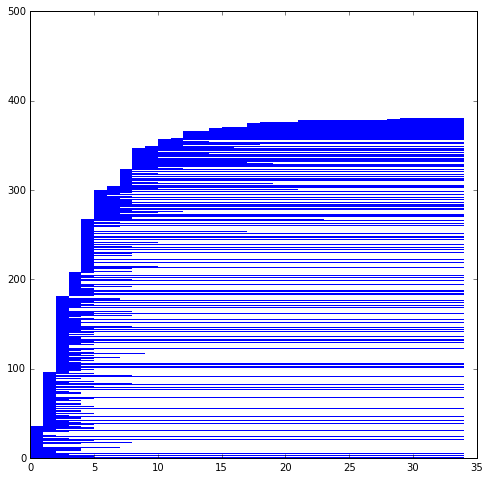

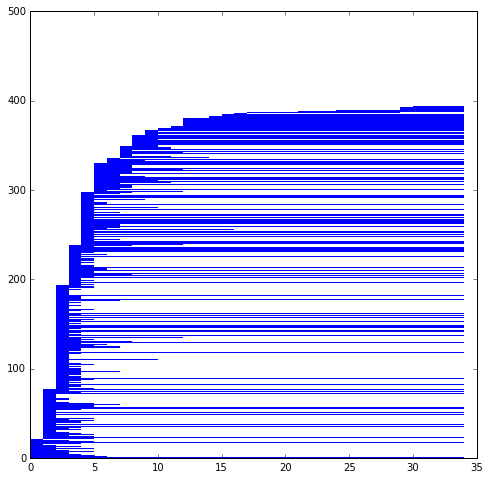

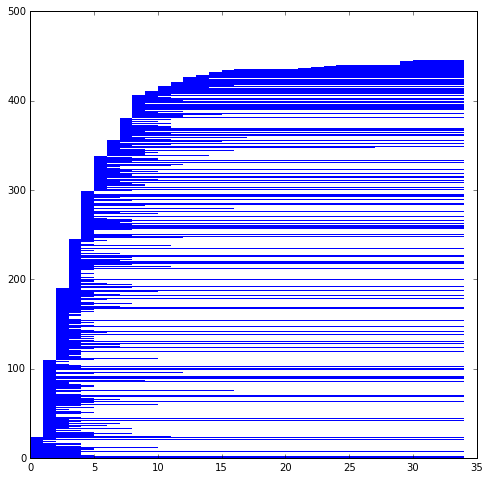

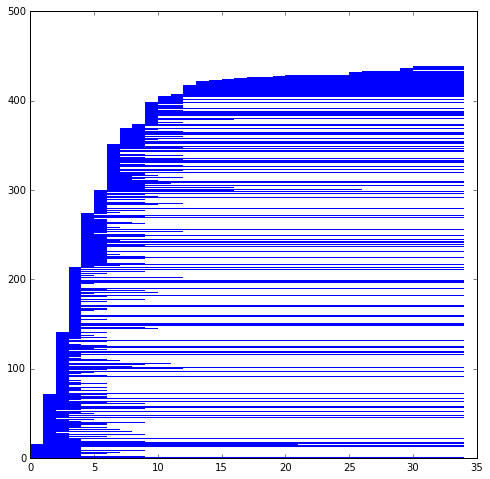

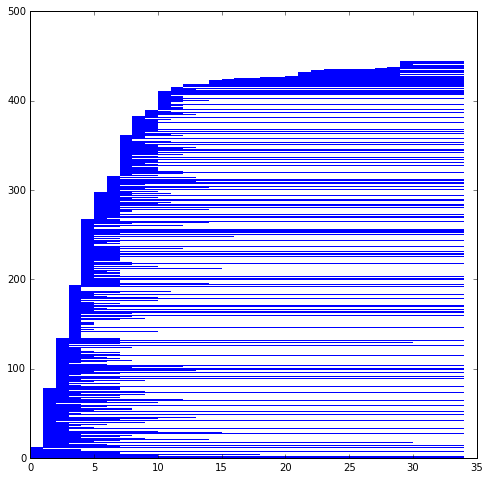

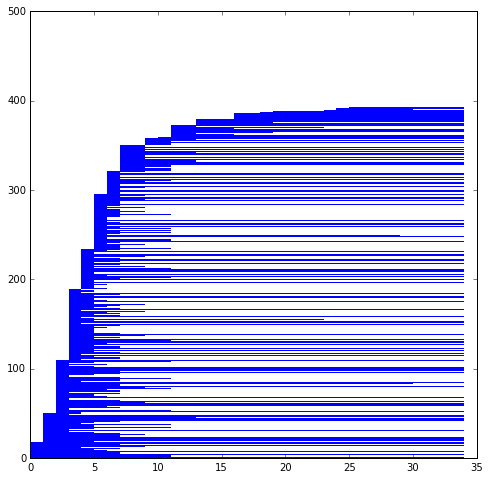

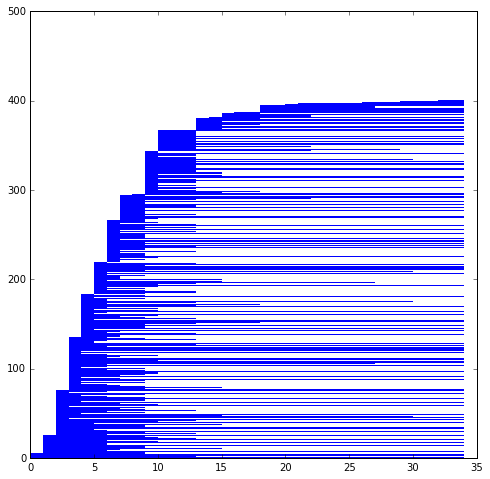

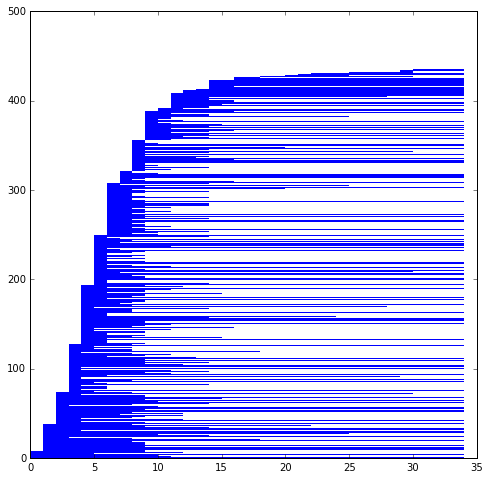

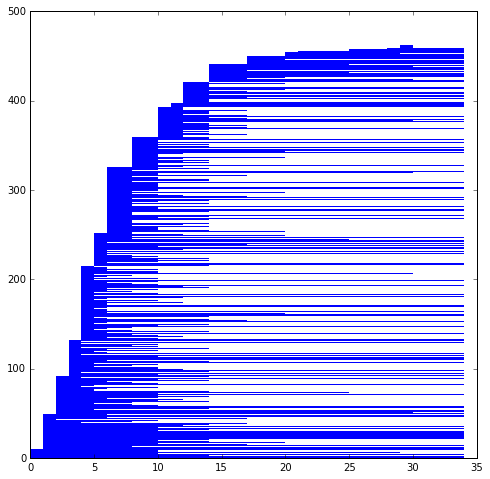

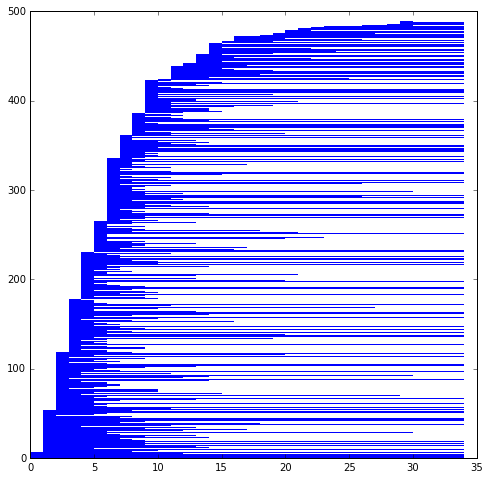

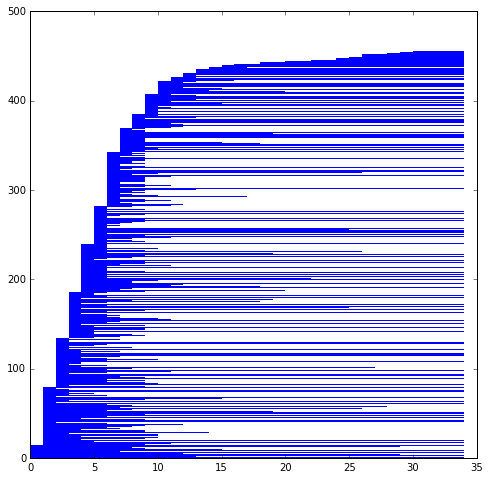

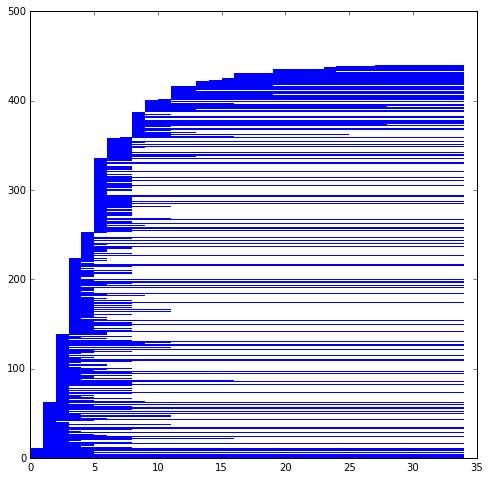

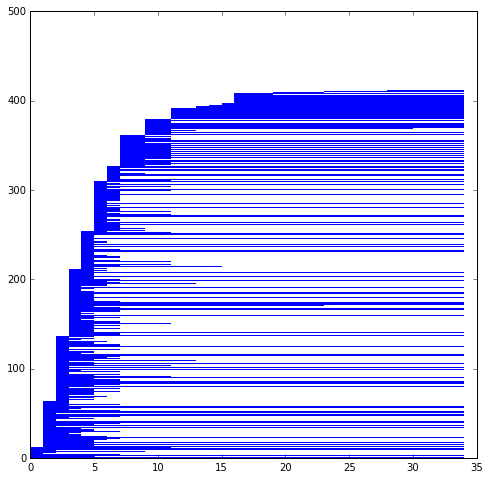

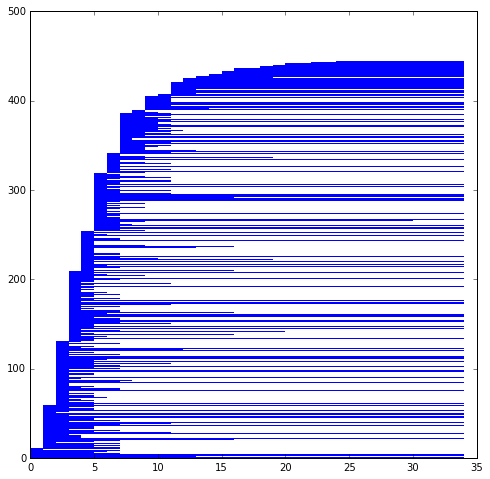

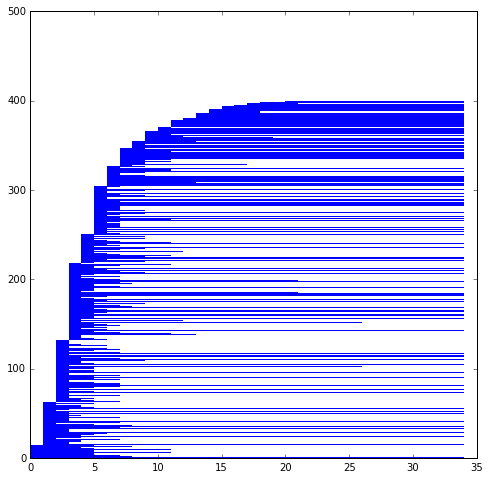

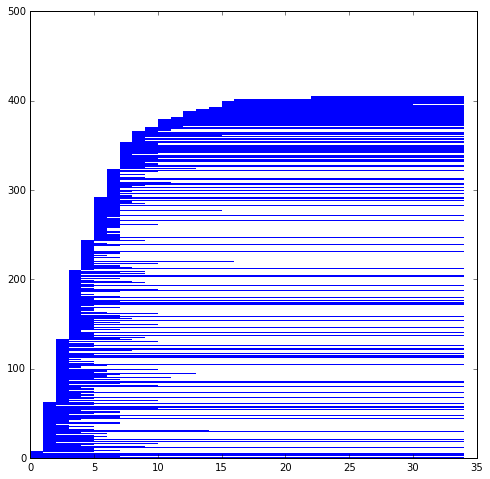

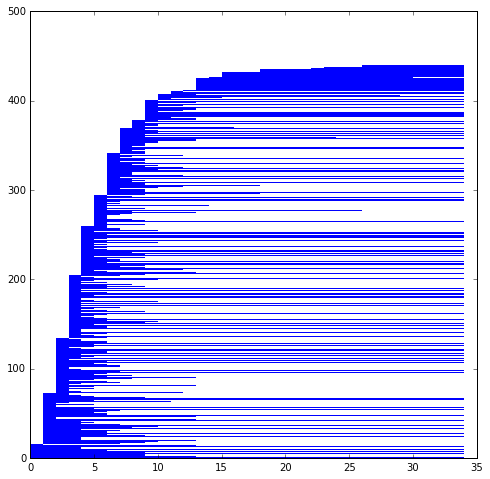

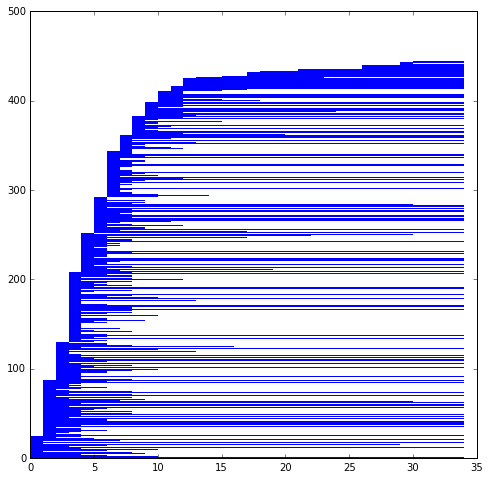

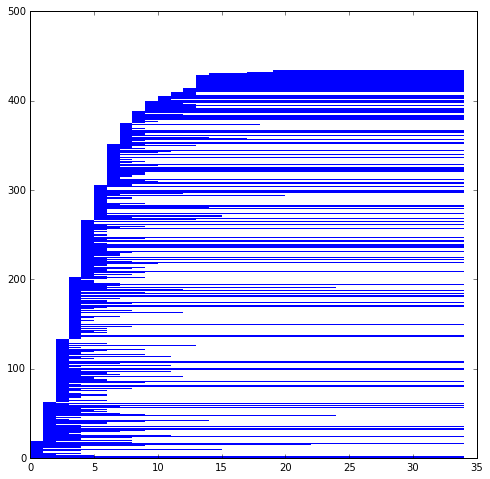

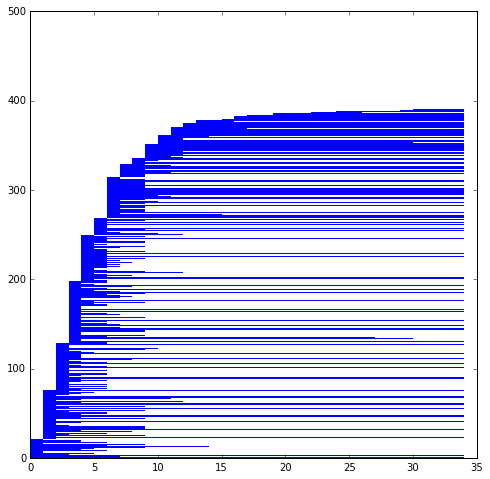

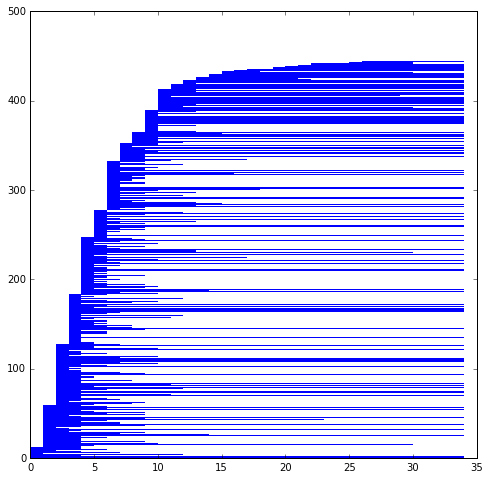

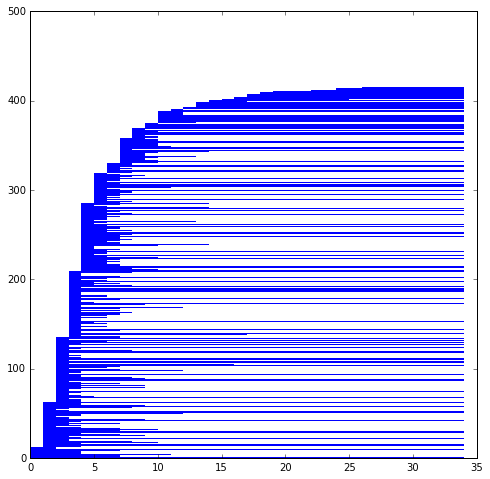

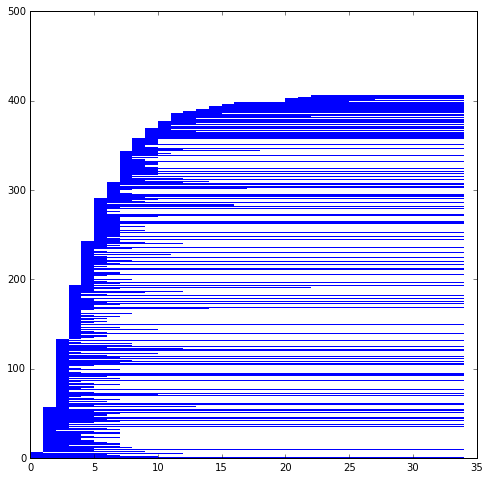

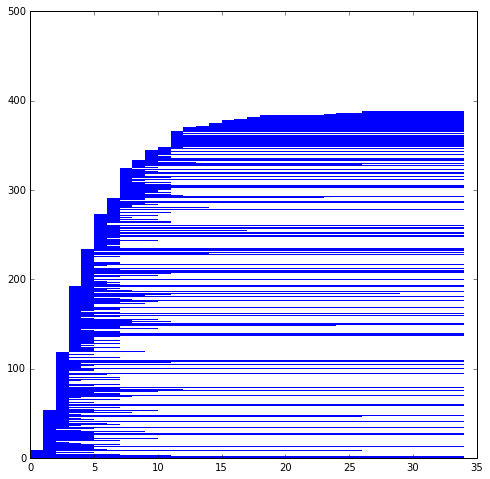

In [15]:
thresholds = list(range(1,35))
for t in range(24):
    comLists = []
    comLists_Node = []
    linksLists = []
    for i in range(len(thresholds)):
        threshold = thresholds[i]
        qualify_links = g.filterEdges(lambda e: e.getSpeedAt(0, t) < threshold)
        sub_g = g.subgraph(qualify_links)
        #print(sub_g.edges)
        cur_cc = sub_g.cc()
        cur_cc_Nodes = sub_g.ccNode()
        comLists.append(cur_cc)
        comLists_Node.append(cur_cc_Nodes)
        linksLists.append(reduce(lambda x, y: x+y, cur_cc, []))
    if t == 0:
        for i in range(len(comLists)):
            m =folium.Map(location=NY_COORDINATES, tiles='cartodbpositron',zoom_start=12.5)
            print("in", i, "comp")
            for j in range(len(comLists[i])):
            #print("compList[i]", comLists[i])
                g.drawEdges(m,comLists[i][j],colors,j%len(colors))
            m.save('./maps2/tmp_{}.html'.format(str(i)))
    DrawBarcode(comLists_Node, thresholds, t, "cc")

in 0 comp
in 1 comp


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:66: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.


in 2 comp
in 3 comp
in 4 comp
in 5 comp
in 6 comp
in 7 comp
in 8 comp
in 9 comp
in 10 comp
in 11 comp
in 12 comp
in 13 comp
in 14 comp
in 15 comp
in 16 comp
in 17 comp
in 18 comp
in 19 comp
in 20 comp
in 21 comp
in 22 comp
in 23 comp
in 24 comp
in 25 comp
in 26 comp
in 27 comp
in 28 comp
in 29 comp
in 30 comp
in 31 comp
in 32 comp
in 33 comp
Max order1988
Max order2040
Max order2034
Max order2033
Max order2026
Max order1937
Max order1958
Max order1965
Max order1944
Max order1996
Max order2015
Max order1996
Max order1934
Max order2019
Max order2015
Max order1982
Max order2024
Max order2040
Max order2031
Max order2004
Max order2006


C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Max order1962
Max order2005
Max order1966


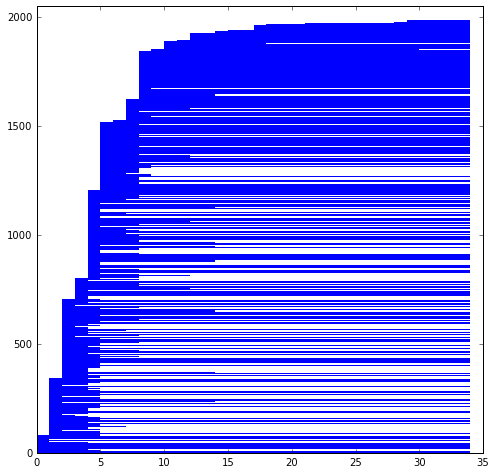

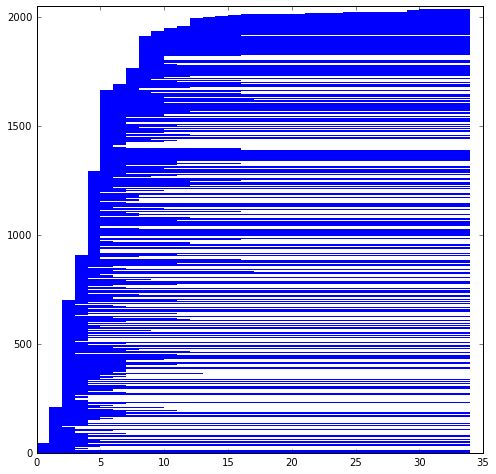

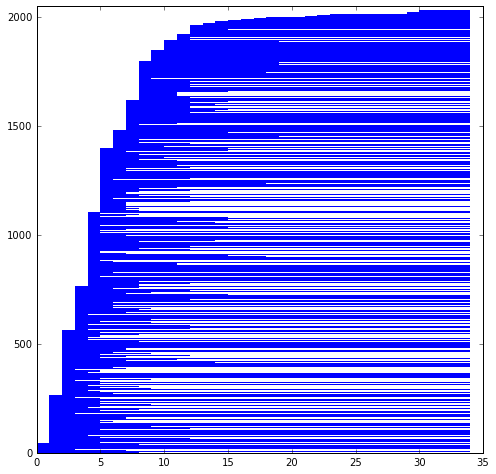

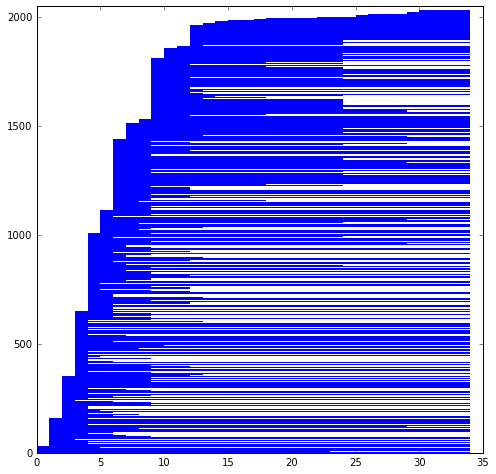

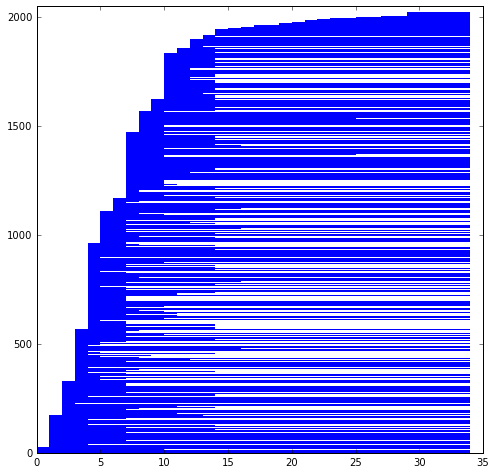

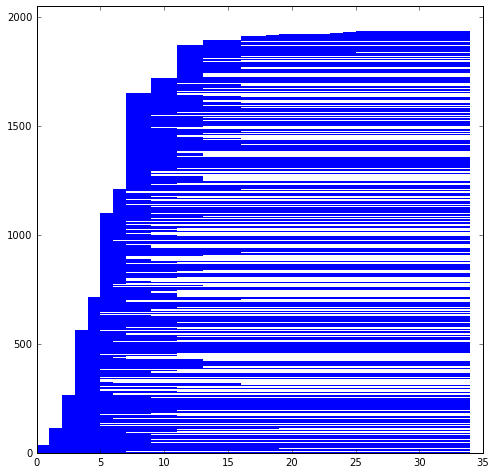

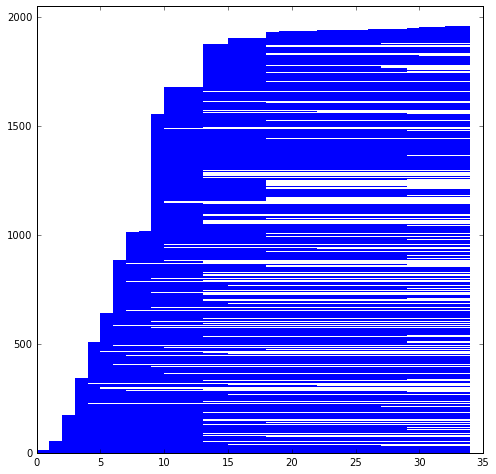

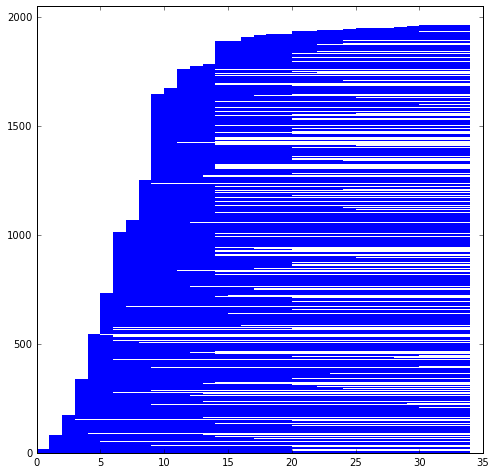

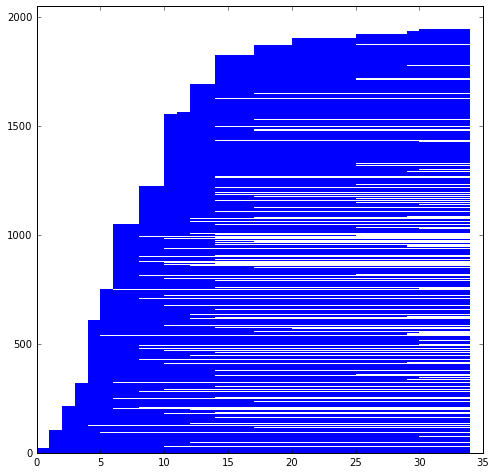

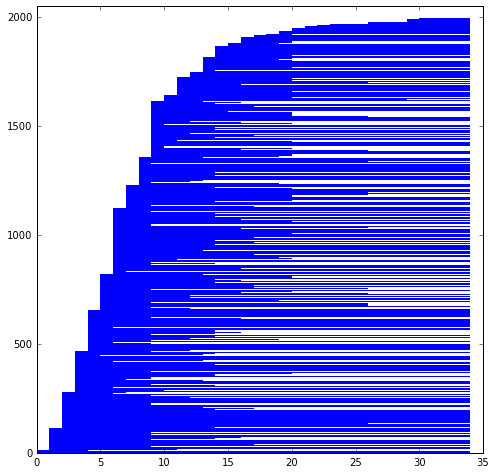

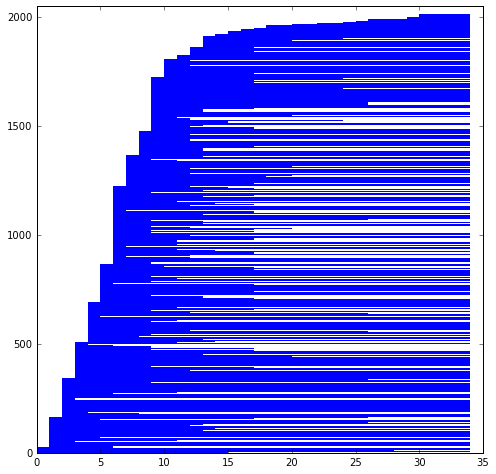

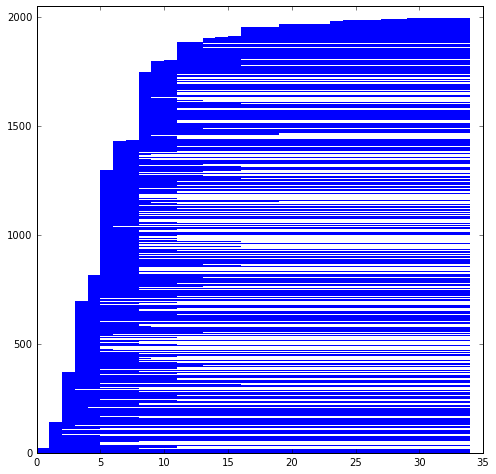

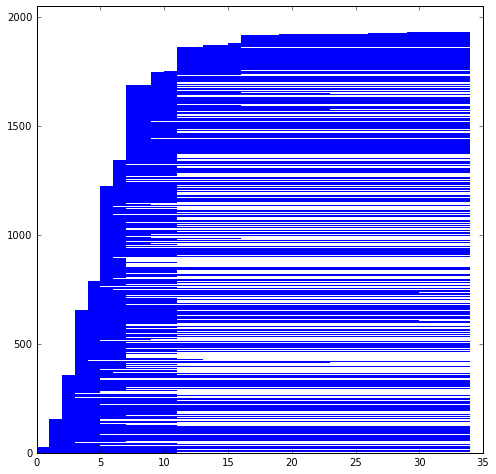

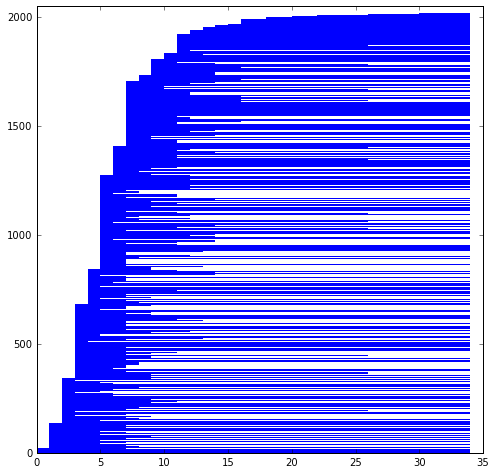

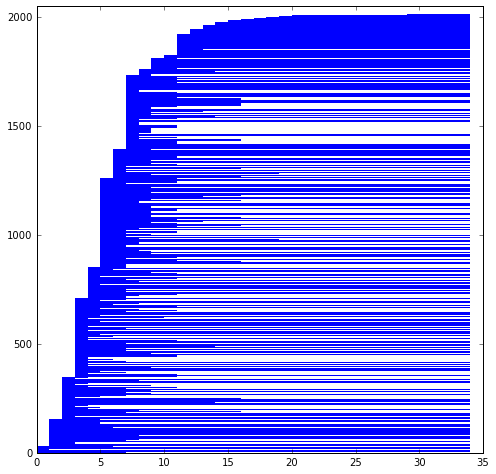

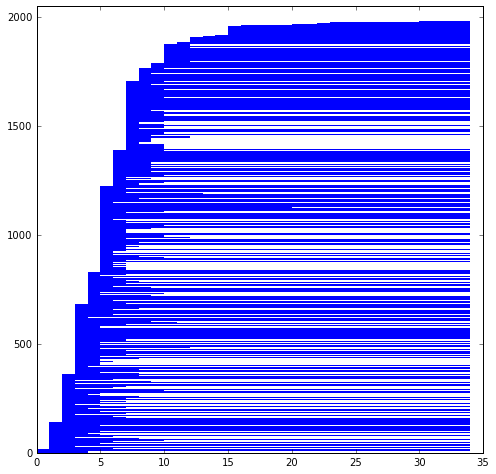

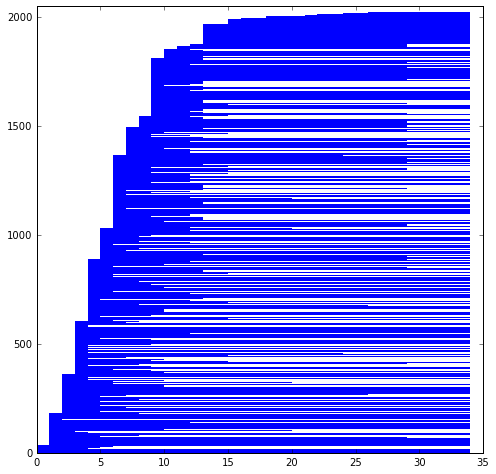

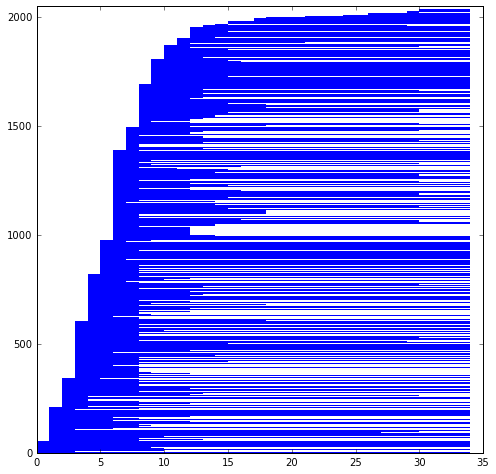

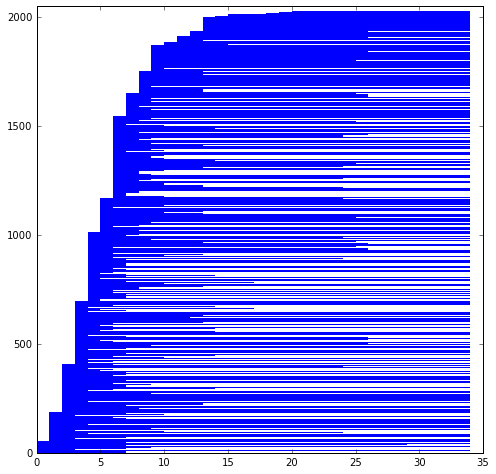

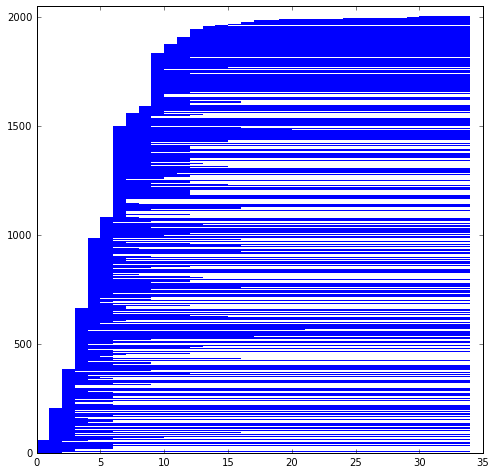

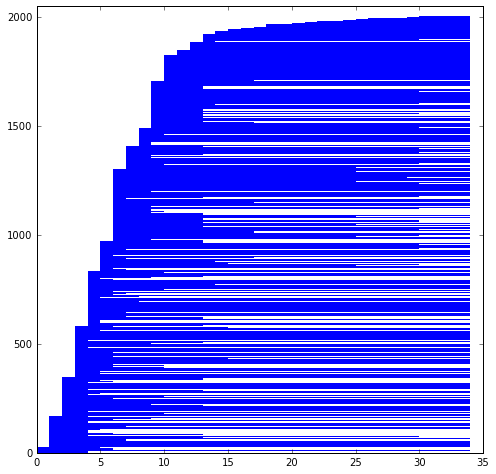

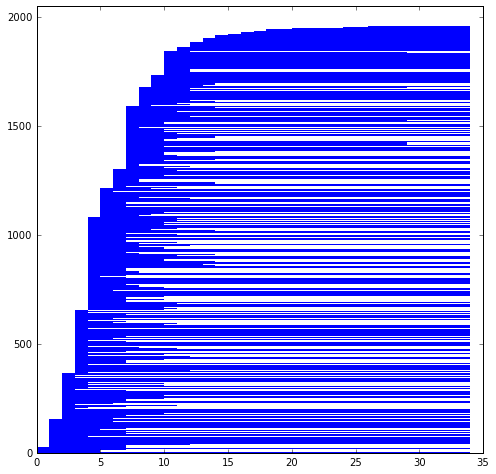

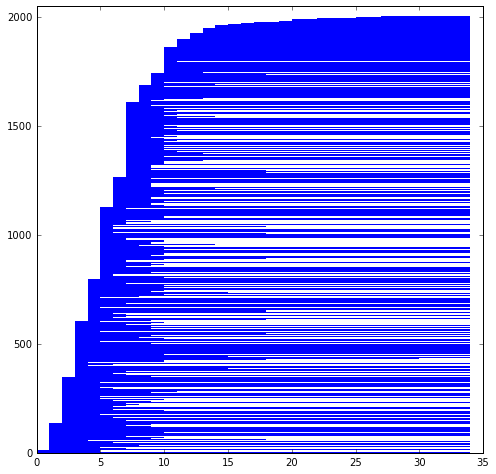

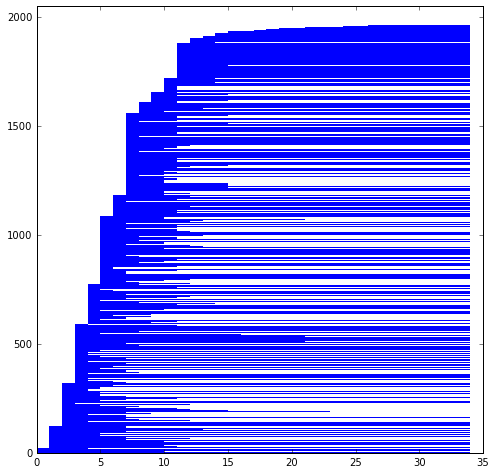

In [16]:
thresholds = list(range(1,35))
for t in range(24):
    clinkslists = []
    cCompLists = []
    cCompLists_Node = []
    for i in range(len(thresholds)):
        threshold = thresholds[i]
        qualify_links = g.filterEdges(lambda e: e.getSpeedAt(0, t) < threshold)
        sub_g = g.subgraph(qualify_links)
        cur_scc = sub_g.scc()
        #print("cur_scc", len(cur_scc))
        cur_scc_node = sub_g.sccNode()
        #print("cur_scc_node", len(cur_scc_node))
        cCompLists.append(cur_scc)
        cCompLists_Node.append(cur_scc_node)
        clinkslists.append(reduce(lambda x, y: x+y, cur_scc, []))
    if t == 0:
        for i in range(len(cCompLists)):
            m1 =folium.Map(location=NY_COORDINATES, tiles='cartodbpositron',zoom_start=12.5)
            print("in", i, "comp")
            for j in range(len(cCompLists[i])):
                g.drawEdges(m1,cCompLists[i][j],colors,j%len(colors))
            m1.save('./maps1/scc_tmp_{}.html'.format(str(i)))
    DrawBarcode(cCompLists_Node, thresholds, t, "scc")

# Automationg the conversion of HTML to PNG
#### For this install chrome driver and copy its path in the enviroment (Windows user)

In [17]:
from selenium import webdriver

In [20]:

for i in range (1,35):
    driver = webdriver.Chrome()
    driver.get('C:/Users/Vipul Satone/IGL/maps1/scc_tmp_{}.html'.format(str(i)))
    #time.sleep(3)
    driver.save_screenshot('C:/Users/Vipul Satone/IGL/maps1/New folder/mapscc_tmp_{}.png'.format(str(i)))
    driver.quit()   

In [23]:
for i in range (1,35):
    driver = webdriver.Chrome()
    driver.get('C:/Users/Vipul Satone/IGL/maps1/scc_tmp_{}.html'.format(str(i)))
   # time.sleep(3)
    driver.save_screenshot('C:/Users/Vipul Satone/IGL/maps1/scc_tmp_{}.html'.format(str(i)))
    driver.quit()   
